<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC31x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron:**
- **Input Layer:**
- **Hidden Layer:**
- **Output Layer:**
- **Activation Function:**
- **Back Propagation:**

1. Neuron
 - 인공신경망은 두뇌의 신경세포, 즉 뉴런이 연결된 형태를 모방한 모델이며 여기서 뉴런은 신경전달물질을 통해 신호를 전달하고 정보를 받아들이며 처리하는 역할을 한다.
2. Input Layer
 - 데이터 셋이 입력되는 층으로 이 층에서는 연산이 수행되지 않고 값을 전달만 하는 층으로 테이터셋의 feature에 따라 입력층 노드의 수가 결정된다.
3. Hidden Layer:
 - input layer에서 입력된 신호가 가중치, 편향과 연산되는 층이다. 계산 결과를 볼 수 없으며 입력 데이터셋의 특성 수와 상관 없이 노드 수를 구성할 수 있다.
4. Output Layer:
 - 연산을 끝낸 값을 출력하는 layer이다 회귀문제, 분류문제 등 문제 종류에 따라 다르게 설계하여야 한다.
5. Activation Function
 - 비선형 구조를 가지게 하여 역전파 과정에서 미분값을 통해 학습이 진행될 수 있게 한다.
6. Back Propagation
 - 순전파와 반대로 출력층 layer부터 계산하여 거꾸로 전파시켜 가중치를 어떻게 업데이트해야할 지를 구하는 알고리즘이다.

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

- 나의 목표 타겟과 실제 모델이 예측한 결과값이 얼마나 차이가 나는지 구하고 오차값을 다시 뒤로 전파해가며 가중치를 업데이트 하는 알고리즘이다.

### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

- 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력하는 구조로 입럭된 신호는 각각의 가중치와 곱해지고
 그 결과를 더해주게 되는 첫번째 단계(가중합)를 거친다. 가중합의 크기를 임계값과 비교하는 활성화 함수를 거쳐 최종 출력값을 결정한다.

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

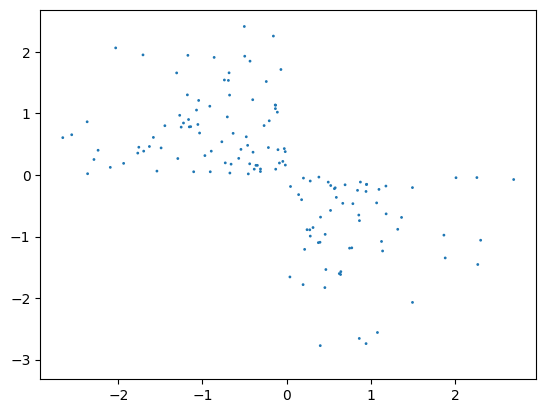

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [31]:
import tensorflow as tf
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
h1 = model1.fit(X, y, epochs=30)


Epoch 1/30
10/10 [==============================] - 1s 2ms/step - loss: 0.8319 - accuracy: 0.4367
Epoch 2/30
10/10 [==============================] - 0s 3ms/step - loss: 0.8263 - accuracy: 0.4367
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.8211 - accuracy: 0.4400
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.8157 - accuracy: 0.4367
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.8106 - accuracy: 0.4400
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.4400
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 0.8004 - accuracy: 0.4433
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7957 - accuracy: 0.4433
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7914 - accuracy: 0.4500
Epoch 10/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7872 - accuracy: 0.4500
Epoch 11/30
10/10 [


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [6]:
X.shape

(300, 2)

In [7]:
y.shape

(300,)

In [14]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [33]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(2, activation='softmax'))
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping_custom_callback = myCallback()
h2 = model2.fit(X, y, epochs=30, callbacks = [early_stopping_custom_callback])

Epoch 1/30
10/10 [==============================] - 1s 3ms/step - loss: 0.7185 - accuracy: 0.5267
Epoch 2/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5333
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.5400
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.5733
Epoch 5/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.6100
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.6467
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.6633
Epoch 8/30
10/10 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.7033
Epoch 9/30
10/10 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.7300
Epoch 10/30
10/10 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7333
Epoch 11/30
10/10 [

### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

#### 아래 실행 버튼을 눌러 셀을 실행시킨 뒤, 진행해주세요.

In [15]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#이 셀의 코드는 변경하지 마세요.

from itertools import cycle
from math import ceil, floor

import matplotlib.pyplot as plt
import numpy as np

from mlxtend.utils import check_Xy, format_kwarg_dictionaries


def get_feature_range_mask(X, filler_feature_values=None, filler_feature_ranges=None):
    """
    Function that constucts a boolean array to get rid of samples
    in X that are outside the feature range specified by filler_feature_values
    and filler_feature_ranges
    """

    if not isinstance(X, np.ndarray) or not len(X.shape) == 2:
        raise ValueError("X must be a 2D array")
    elif filler_feature_values is None:
        raise ValueError("filler_feature_values must not be None")
    elif filler_feature_ranges is None:
        raise ValueError("filler_feature_ranges must not be None")

    mask = np.ones(X.shape[0], dtype=bool)
    for feature_idx in filler_feature_ranges:
        feature_value = filler_feature_values[feature_idx]
        feature_width = filler_feature_ranges[feature_idx]
        upp_limit = feature_value + feature_width
        low_limit = feature_value - feature_width
        feature_mask = (X[:, feature_idx] > low_limit) & (X[:, feature_idx] < upp_limit)
        mask = mask & feature_mask

    return mask


def plot_decision_regions(
    X,
    y,
    clf,
    feature_index=None,
    filler_feature_values=None,
    filler_feature_ranges=None,
    ax=None,
    X_highlight=None,
    zoom_factor=1.0,
    legend=1,
    hide_spines=True,
    markers="s^oxv<>",
    colors=(
        "#1f77b4,#ff7f0e,#3ca02c,#d62728,"
        "#9467bd,#8c564b,#e377c2,"
        "#7f7f7f,#bcbd22,#17becf"
    ),
    scatter_kwargs=None,
    contourf_kwargs=None,
    contour_kwargs=None,
    scatter_highlight_kwargs=None,
):
    """Plot decision regions of a classifier.
    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
    y : array-like, shape = [n_samples]
        True class labels.
    clf : Classifier object.
        Must have a .predict method.
    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.
    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.
    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.
    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.
    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.
    zoom_factor : float (default: 1.0)
        Controls the scale of the x- and y-axis of the decision plot.
    hide_spines : bool (default: True)
        Hide axis spines if True.
    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.
    markers : str (default: 's^oxv<>')
        Scatterplot markers.
    colors : str (default: 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.
    scatter_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.
    contourf_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contourf function.
    contour_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contour function
        (which draws the lines between decision regions).
    scatter_highlight_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.
    Returns
    ---------
    ax : matplotlib.axes.Axes object
    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
    """

    check_Xy(X, y, y_int=True)  # Validate X and y arrays
    dim = X.shape[1]

    if ax is None:
        ax = plt.gca()

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError("X_highlight must be a NumPy array or None")
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError("X_highlight must be a 2D array")

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError("feature_index requires more than one training feature")
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                "Unable to unpack feature_index. Make sure feature_index "
                "only has two dimensions."
            )
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                "feature_index values out of range. X.shape is {}, but "
                "feature_index is {}".format(X.shape, feature_index)
            )
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError(
                "Filler values must be provided when "
                "X has more than 2 training features."
            )

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    "filler_feature_values and filler_feature_ranges must "
                    "have the same keys"
                )

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                "Column(s) {} need to be accounted for in either "
                "feature_index or filler_feature_values".format(missing_cols)
            )

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(",")
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = (
        X[:, x_index].min() - 1.0 / zoom_factor,
        X[:, x_index].max() + 1.0 / zoom_factor,
    )
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = (
            X[:, y_index].min() - 1.0 / zoom_factor,
            X[:, y_index].max() + 1.0 / zoom_factor,
        )

    xnum, ynum = plt.gcf().dpi * plt.gcf().get_size_inches()
    xnum, ynum = floor(xnum), ceil(ynum)
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, num=xnum), np.linspace(y_min, y_max, num=ynum)
    )

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]
    Z = clf.predict(X_predict.astype(X.dtype))
    if Z.shape[1] == 2:
        Z = Z[:,1]
    Z = Z.reshape(xx.shape)
    # Plot decisoin region
    # Make sure contourf_kwargs has backwards compatible defaults
    contourf_kwargs_default = {"alpha": 0.45, "antialiased": True}
    contourf_kwargs = format_kwarg_dictionaries(
        default_kwargs=contourf_kwargs_default,
        user_kwargs=contourf_kwargs,
        protected_keys=["colors", "levels"],
    )
    cset = ax.contourf(
        xx, yy, Z, colors=colors, levels=np.arange(Z.max() + 2) - 0.5, **contourf_kwargs
    )

    contour_kwargs_default = {"linewidths": 0.5, "colors": "k", "antialiased": True}
    contour_kwargs = format_kwarg_dictionaries(
        default_kwargs=contour_kwargs_default,
        user_kwargs=contour_kwargs,
        protected_keys=[],
    )
    ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)

    ax.axis([xx.min(), xx.max(), yy.min(), yy.max()])

    # Scatter training data samples
    # Make sure scatter_kwargs has backwards compatible defaults
    scatter_kwargs_default = {"alpha": 0.8, "edgecolor": "black"}
    scatter_kwargs = format_kwarg_dictionaries(
        default_kwargs=scatter_kwargs_default,
        user_kwargs=scatter_kwargs,
        protected_keys=["c", "marker", "label"],
    )
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                X,
                filler_feature_values=filler_feature_values,
                filler_feature_ranges=filler_feature_ranges,
            )
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(
            x=x_data,
            y=y_data,
            c=colors[idx],
            marker=next(marker_gen),
            label=c,
            **scatter_kwargs
        )

    if hide_spines:
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                X_highlight,
                filler_feature_values=filler_feature_values,
                filler_feature_ranges=filler_feature_ranges,
            )
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        # Make sure scatter_highlight_kwargs backwards compatible defaults
        scatter_highlight_defaults = {
            "c": "none",
            "edgecolor": "black",
            "alpha": 1.0,
            "linewidths": 1,
            "marker": "o",
            "s": 80,
        }
        scatter_highlight_kwargs = format_kwarg_dictionaries(
            default_kwargs=scatter_highlight_defaults,
            user_kwargs=scatter_highlight_kwargs,
        )
        ax.scatter(x_data, y_data, **scatter_highlight_kwargs)

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, framealpha=0.3, scatterpoints=1, loc=legend)

    return ax

#### 아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

22500/22500 [==============================] - 49s 2ms/step


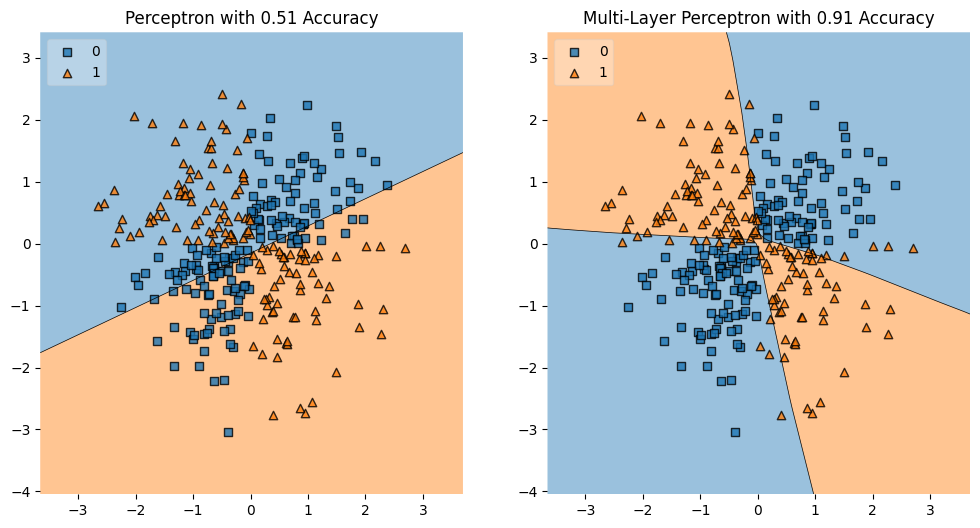

In [34]:
# 이 셀의 코드는 변경하지 마세요

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

- 단층 퍼셉트론은 다층 퍼셉트론과 다르게 XOR의 연산의 경우에는 선형으로 분류가 불가능하다 따라서 한계가 존재하므로 정확도가 비교적 낮게 나온것으로 예상된다

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 258 to 68
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 1)
target = 'target'
features = df.drop(columns = [target]).columns

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

In [37]:
y_train.shape

(242,)

In [38]:
X_train.shape

(242, 13)

In [43]:
!pip install scikeras
!pip install -U keras-tuner

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import keras
import tensorflow as tf
import IPython
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import keras_tuner as kt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
tf.random.set_seed(7)
def model_builder(nodes=16, activation='relu'):

  model3 = Sequential()
  model3.add(Dense(nodes, input_dim=13,activation=activation))
  model3.add(Dense(nodes, input_dim=13,activation=activation))
  model3.add(Dense(1, activation='sigmoid'))

  model3.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

  return model3

model3 = KerasClassifier(model=model_builder, batch_size=8, verbose=0)

batch_size=[64, 128, 256]
epochs=[10, 20, 30]
nodes=[64, 128, 256]
activation=['sigmoid']
param_grid=dict(batch_size=batch_size, epochs=epochs, model__nodes=nodes, model__activation=activation)

grid = GridSearchCV(estimator=model3, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [53]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8225308641975309 using {'batch_size': 64, 'epochs': 30, 'model__activation': 'sigmoid', 'model__nodes': 256}


In [58]:
model4 = Sequential()
model4.add(Dense(256, input_dim = 13, activation = 'relu'))
model4.add(Dense(256, input_dim = 13, activation = 'relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])
results = model4.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled,y_test))



Epoch 1/30
8/8 [==============================] - 4s 99ms/step - loss: 0.5840 - accuracy: 0.6860 - val_loss: 0.4516 - val_accuracy: 0.7869
Epoch 2/30
8/8 [==============================] - 0s 13ms/step - loss: 0.3994 - accuracy: 0.8347 - val_loss: 0.3873 - val_accuracy: 0.8361
Epoch 3/30
8/8 [==============================] - 0s 17ms/step - loss: 0.3348 - accuracy: 0.8512 - val_loss: 0.3841 - val_accuracy: 0.9016
Epoch 4/30
8/8 [==============================] - 0s 19ms/step - loss: 0.3132 - accuracy: 0.8554 - val_loss: 0.3931 - val_accuracy: 0.9016
Epoch 5/30
8/8 [==============================] - 0s 19ms/step - loss: 0.2931 - accuracy: 0.8760 - val_loss: 0.4260 - val_accuracy: 0.8525
Epoch 6/30
8/8 [==============================] - 0s 20ms/step - loss: 0.2714 - accuracy: 0.8884 - val_loss: 0.4124 - val_accuracy: 0.8689
Epoch 7/30
8/8 [==============================] - 0s 20ms/step - loss: 0.2542 - accuracy: 0.8926 - val_loss: 0.4291 - val_accuracy: 0.8689
Epoch 8/30
8/8 [===========

In [59]:
model4.evaluate(X_test_scaled,  y_test, verbose=2) 

2/2 - 0s - loss: 0.7286 - accuracy: 0.8197 - 46ms/epoch - 23ms/step


[0.7285727262496948, 0.8196721076965332]